# COCO dataset - Keypoints

In [4]:
import sys
IN_COLAB = 'google.colab' in sys.modules
print(IN_COLAB)

True


In [5]:
import socket
print(socket.gethostname())

045e8d16b616


In [6]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir('/content/drive/MyDrive/ColabNotebooks/2022_fall_bigdata/')

Mounted at /content/drive


In [7]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

* Annotation  
2017 Train/Val annotations [241MB] http://images.cocodataset.org/annotations/annotations_trainval2017.zip
* Images
2017 Val images [5K/1GB] http://images.cocodataset.org/zips/val2017.zip

In [8]:
dataDir='data/annotations_trainval2017'
loc = '{}/annotations/'.format(dataDir)

In [9]:
loc

'data/annotations_trainval2017/annotations/'

## Annotation - instances

In [10]:
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [11]:
annFile

'data/annotations_trainval2017/annotations/instances_val2017.json'

In [12]:
#!head $annFile

COCO api class that loads COCO annotation file and prepare data structures.

In [13]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.20s)
creating index...
index created!


In [14]:
coco

### Get img ids that satisfy given filter conditions.

In [15]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','skateboard'])
catIds = coco.getCatIds(catNms=['person','snowboard'])

In [16]:
catIds

[1, 36]

In [17]:
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[343937, 562818, 42628, 378244, 426376, 411530, 117645, 97679, 217872, 80273, 184978, 490515, 193429, 563349, 309655, 44195, 561958, 428454, 109992, 492968, 400044, 425906, 95155, 463542, 37689, 36539, 361919, 23359, 350405, 402118, 142790, 125257, 387916, 364884, 341719, 94944, 407650, 451043, 447465, 74860, 456303, 326128, 89078, 516601, 491130, 470779, 393469, 97278]


In [18]:
len(imgIds)

48

In [19]:
idx = 0
imgIds = coco.getImgIds(imgIds = [imgIds[idx]])
print(imgIds)

[343937]


In [20]:
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds)[0]

In [21]:
img

{'license': 4,
 'file_name': '000000343937.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000343937.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-20 12:55:34',
 'flickr_url': 'http://farm5.staticflickr.com/4072/4320314557_bfcc972543_z.jpg',
 'id': 343937}

In [22]:
img['file_name']

'000000343937.jpg'

In [23]:
# use url to load image
I = io.imread(img['coco_url'])

## Annotations - Keypoints

In [24]:
dataDir, dataType

('data/annotations_trainval2017', 'val2017')

In [25]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
print(annFile)

data/annotations_trainval2017/annotations/person_keypoints_val2017.json


In [26]:
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=2.15s)
creating index...
index created!


In [27]:
annIds = coco_kps.getAnnIds(imgIds=img['id'], iscrowd=None)
print(annIds)

[425370]


In [28]:
anns = coco_kps.loadAnns(annIds)

In [29]:
#anns

In [30]:
anns[0]['image_id']

343937

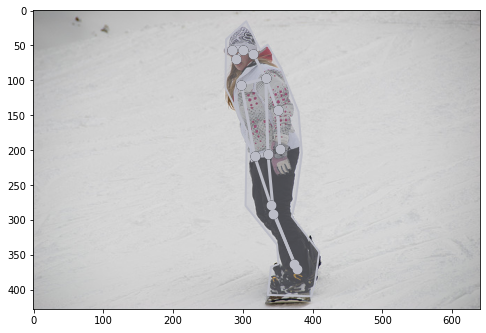

In [31]:
plt.figure()
plt.imshow(I)
coco_kps.showAnns(anns)

In [32]:
kpts = anns[0]['keypoints']

```
v = 0 , not labled
v = 1 , labeled but not visible
v = 2 , labeled and visiable
```

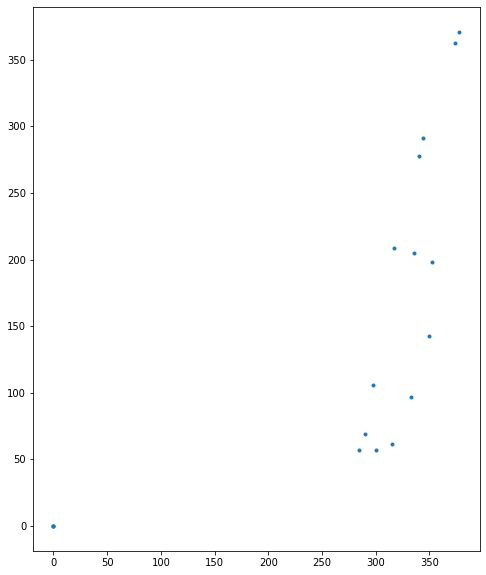

In [33]:
kpts_x = kpts[::3]
kpts_y = kpts[1::3]

plt.figure()
plt.plot(kpts_x, kpts_y, '.')

* References
    * https://cocodataset.org/#download
    * https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb